https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a

In [2]:
#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [7, 3]
#plt.rcParams['figure.dpi'] = 100
#plt.style.use('seaborn-notebook')

# Exemplos

Nesta seção iremos ver problemas que podem ser resolvidos utilizando EDO

# Exemplo: Crescimento exponencial

Quando o crescimento populacional é proporcional a quantidade de indivíduos presente, ele pode ser modelado como:

\begin{equation}
\dfrac{dN}{dt} = kN
\end{equation}

cuja solução é:

\begin{equation}
N(t) = N_0 e^{kt}
\end{equation}


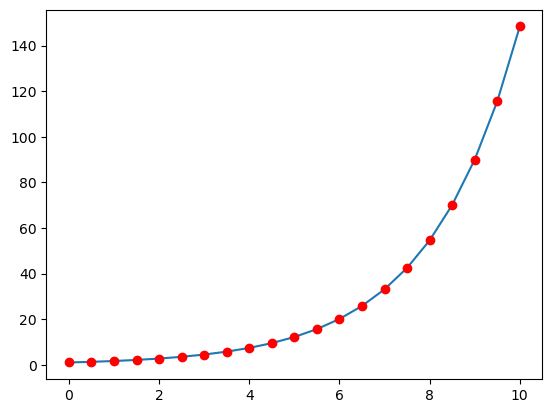

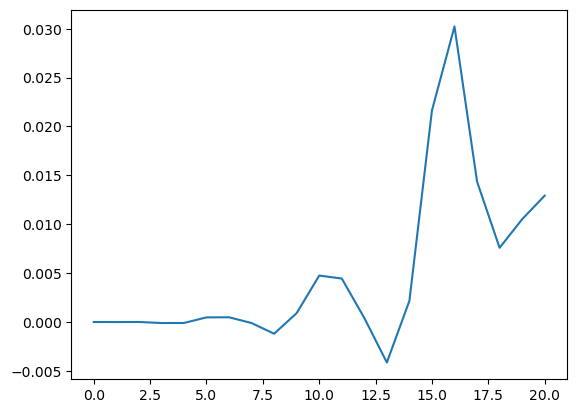

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', 
#t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)

def crescimento_exponencial(t, N, k):
    dNdt = k*N
    return dNdt

t = np.linspace(0,10,21)
k = 0.5
N0 = 1

sol = solve_ivp( crescimento_exponencial, t_span=[0, 10],y0=[1],t_eval=t,args=[k])
#print(sol)
plt.plot(sol.t, sol.y[0])

resposta = N0*np.exp(k*sol.t)
plt.plot(sol.t, resposta, 'or')
plt.figure()
plt.plot(resposta - sol.y[0])

# Exemplo: Modelo logístico

O modelo logístico é muitas vezes utilizado para descrever o crescimento de uma população em um ambiente com recursos limitados.
Neste modelo a taxa de crescimento populacional se torna menor à medida que o tamanho da população se aproxima de um máximo imposto por recursos limitantes no ambiente, conhecido como capacidade de suporte ($K$) e pode ser descrito pela equação diferencial abaixo:

\begin{equation}
\dfrac{dN}{dt} = r \left(\dfrac{K - N}{K}\right)N
\end{equation}

onde $r$ é a taxa de crescimento.

A solução analítica é dada por:

\begin{equation}
N(t) = \dfrac{N_0 \cdot K}{K - N_0 e^{-rt} + N_0}
\end{equation}

onde $N_0$ é a população no instante $t= 0$.

![crescimentologistico](figuras/ajuste-curvas-fig02.png)

Simule o crescimento de uma população com $r = 0,02$ e $K = 100$ e para diversos valores de $N_0$ (1, 50, 150, 200) no intervalo de [0, 600].


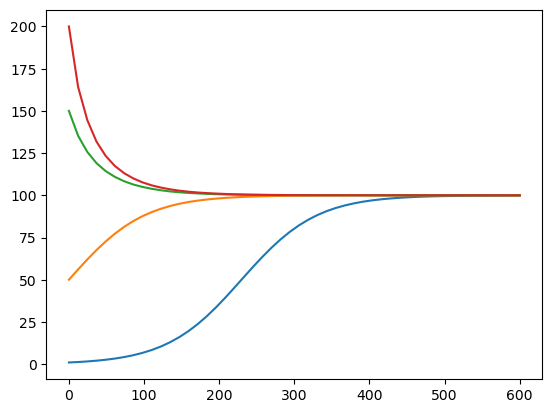

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def crescimento_logistico(t, N):
    r = 0.02
    K = 100
    dNdt = r*((K - N)/K)*N
    return dNdt

t = np.linspace(0,600,50)

N0 = [1, 50, 150, 200]

for n0 in N0:
    sol = solve_ivp( crescimento_logistico, t_span = [0, 600], y0 = [n0], t_eval = t)
    N = sol.y[0]
    T = sol.t
    plt.plot(T, N)

# Exemplo: Lorenz

Um exemplo de um modelo não linear baseado na dinâmica dos fluídos atmosféricos são as equações de Lorenz.

\begin{equation} %\label{eq:lorenz}
\begin{array}{l}
\dfrac{dx}{dt} = -\sigma x + \sigma y \\
\dfrac{dy}{dt} = r x - y - xz \\
\dfrac{dz}{dt} = -b z + x y 
\end{array}
\end{equation}

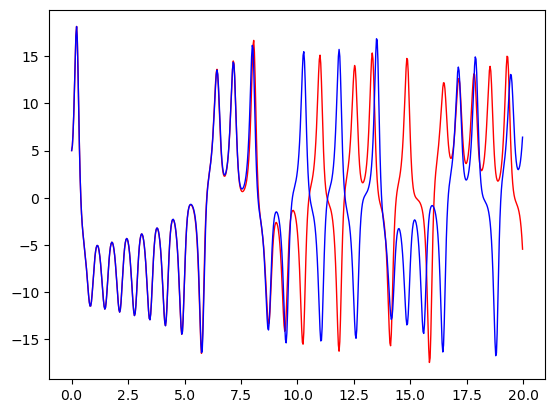

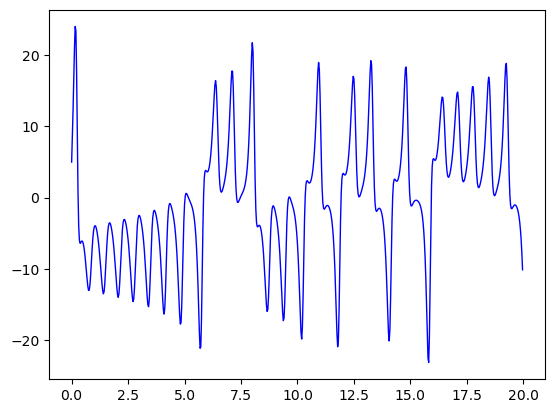

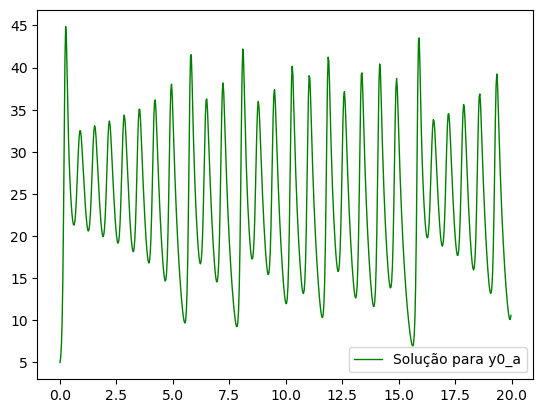

In [4]:
def lorenz(t, Y):
    sigma = 10
    rho = 28
    beta = 8/3
    x = Y[0]
    y = Y[1]
    z = Y[2]
    yp = [sigma*(y - x) , x*(rho - z) - y, x*y - beta*z]
    return yp

# definindo os instantes que serão utilizados no cálculo 
h = 0.03125

tinicial = 0
tfinal = 20
t = np.arange(tinicial, tfinal, h)

# definindo a condição inicial (PVI)
y0_a = [5.0 , 5.0 , 5.0]
y0_b = [5.0 , 5.0 , 5.01]

# chamando o método numérico que calcula a solução da EDO
sol = solve_ivp(lorenz, y0 = y0_a, t_span = [tinicial, tfinal],  t_eval = t)
sol2 = solve_ivp(lorenz, y0 = y0_b, t_span = [tinicial, tfinal],  t_eval = t)

# exibindo o gráfico da resposta
plt.plot(sol.t, sol.y[0], '-r', sol2.t, sol2.y[0], '-b' , lw=1)
plt.figure()
plt.plot(sol.t, sol.y[1], '-b', lw=1)
plt.figure()
plt.plot(sol.t, sol.y[2], '-g', lw=1)
plt.legend(['Solução para y0_a', 'Solução para y0_b'])

# Exemplo: EDO de ordem superior

Considere uma EDO de ordem superior, como:

\begin{equation}
\dfrac{d^nx}{dt^n} = f(t,x)
\end{equation}

Suponha um sistema massa-mola com amortecimento.

<img src="figuras/massamola.jpg" width=200 />

Pela 2ª lei de Newton, sabemos que:

\begin{equation}
ma = -kx + mg -bv
\end{equation}

e, sabendo que a aceleração pode ser escrito como $a = \dfrac{d^2x}{dt^2}$:

\begin{equation}
m \dfrac{d^2x}{dt^2} = -kx + mg - bv
\end{equation}

Isolando a derivada, temos:

\begin{equation}
\dfrac{d^2x}{dt^2} = -\dfrac{k}{m}x + g - \dfrac{b}{m}v
\end{equation}

Observe que os métodos vistos utilizam o formato:

\begin{equation}
\dfrac{dx}{dt} = f(t,x)
\end{equation}

ou, no caso de um sistema com 2 variáveis:

\begin{aligned}
\dfrac{dy_1}{dt} = f_1(t,y_1, y_2) \\
\dfrac{dy_2}{dt} = f_2(t,y_1, y_2) \\
\end{aligned}




Assim, precisamos transformar o problema em um dos formatos anteriores.
Podemos fazê-lo se criarmos **um sistema com 2 variáveis**:

* $y_1 = v$ 
* $y_2 = x$

Assim, teremos:

\begin{equation}
\dfrac{d^2x}{dt^2} = \dfrac{dv}{dt}
\end{equation}

o que nos leva à:

\begin{aligned}
\dfrac{dy_1}{dt} &= -\dfrac{k}{m}y_2 + g - \dfrac{b}{m} y_1 \\
\dfrac{dy_2}{dt} &= y_1
\end{aligned}

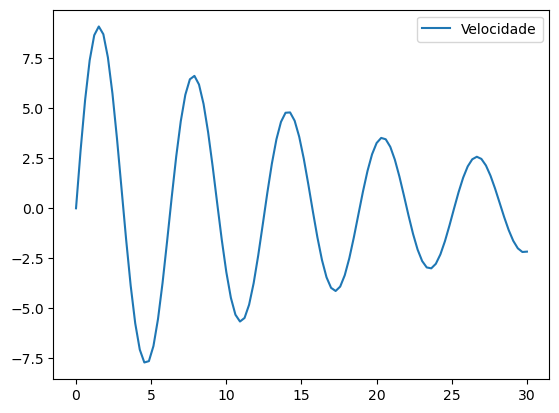

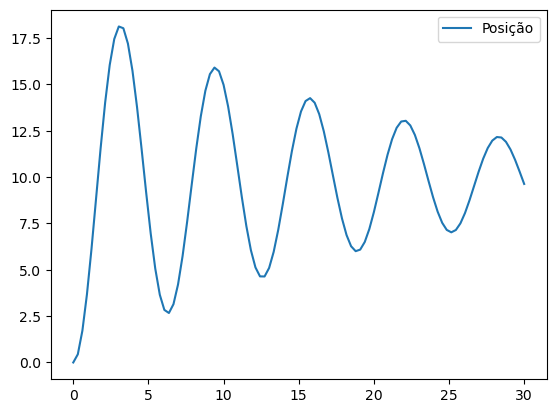

In [5]:
# Y = [v, x]
def massamola(t, Y):
    k = 1
    b = 0.1
    m = 1
    g = 9.8
    v = Y[0]
    x = Y[1]
    dvdt = -k*x/m + g - b*v/m
    dxdt = v
    return [dvdt, dxdt]

t = np.linspace(0, 30, 100)
sol = solve_ivp( massamola, t_span = [0,30], y0 = [0, 0], t_eval = t)
v = sol.y[0]
x = sol.y[1]
plt.plot(t, v)
plt.legend(['Velocidade'])
plt.figure()
plt.plot(t, x)
plt.legend(['Posição'])


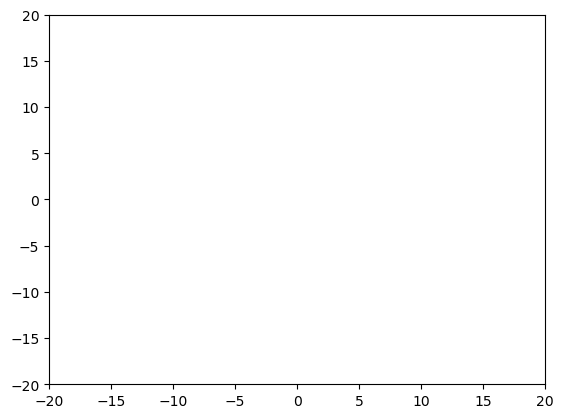

In [6]:
plt.rcParams["animation.html"] = "jshtml"

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.arange(0, 20, 0.1)
sol = solve_ivp(lorenz, y0 = y0_a, t_span = [tinicial, tfinal],  t_eval = t)

X = sol.y[0]
Y = sol.y[1]

fig, ax = plt.subplots()
ax.axis([-20, 20 ,-20, 20])

l, = ax.plot([],[], 'r-')

def animate_init(): #tells our animator what artists will need re-drawing every time
    return l

def animate(i):
    l.set_data(X[i-2:i], Y[i-2:i])
    return l

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(X))
ani
